<a href="https://colab.research.google.com/github/mohsen-dl/classification-neural-network/blob/main/classification_adult_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
df = pd.read_csv('adult_data_with_header.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.shape

(32561, 15)

In [8]:
df.drop(['fnlwgt'], axis=1, inplace=True)
df 

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [10]:
df['workclass'] = df['workclass'].map({' Self-emp-not-inc' : 'self-employed', ' Self-emp-inc' : 'self-employed',
                                       ' Federal-gov' : 'gov', ' Local-gov' : 'gov', ' State-gov' : 'gov',
                                       ' Without-pay' : 'unemployed', ' Never-worked' : 'unemployed',
                                       ' Private' : ' Private', ' ?' : ' ?',
                                      }).astype(str) #mapping numbers
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,self-employed,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [12]:
df['education'] = df['education'].map({' Preschool' :0, ' 1st-4th' :0, ' 5th-6th' :0, ' 7th-8th' :0, ' 9th' :0, ' 10th' :0, ' 11th' :0, ' 12th' :0, ' HS-grad' :1, ' Prof-school' :1, ' Assoc-acdm' :2, ' Assoc-voc' :2, ' Some-college' :3, ' Bachelors' :4, ' Masters' :5 , ' Doctorate' :6}).astype(int) #mapping numbers
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,gov,4,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,self-employed,4,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,1,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,0,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,4,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
df.drop(['education-num'], axis=1, inplace=True)
df  

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,gov,4,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,self-employed,4,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,1,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,4,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,2,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,1,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,1,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,1,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [14]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [15]:
df['marital-status'] = df['marital-status'].map({' Married-civ-spouse' :"married", ' Married-AF-spouse' :"married", ' Never-married' :"not-married", ' Divorced' :"not-married", ' Separated' :"not-married", ' Married-spouse-absent' :"not-married", ' Widowed' :"Widowed"}).astype(str) #mapping numbers
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,gov,4,not-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,self-employed,4,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,1,not-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,0,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,4,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [17]:
df['occupation'] = df['occupation'].map({' Adm-clerical' :"adim", ' Exec-managerial' :"adim",
                                         ' Prof-specialty' :"Prof-specialty",
                                         ' Other-service' :"service", ' Protective-serv' :"service", ' Priv-house-serv' :"service",
                                         ' Sales' :"sales",
                                         ' Craft-repair' :"general", ' Transport-moving' :"general", ' Farming-fishing' :"general",
                                         ' Machine-op-inspct' :"general", ' Tech-support' :"general", ' Farming-fishing' :"general",
                                         ' Armed-Forces' :"military",
                                         ' ?':' ?'
                                        }).astype(str) #mapping numbers
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,gov,4,not-married,adim,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,self-employed,4,married,adim,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,1,not-married,nan,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,0,married,nan,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,4,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
df.shape

(32561, 13)

In [19]:
df = df.replace(' \?',np.nan, regex=True)

In [20]:
df.dropna()
df.shape

(32561, 13)

In [21]:
df['workclass'].unique()

array(['gov', 'self-employed', ' Private', nan, 'unemployed'],
      dtype=object)

In [22]:
df.dropna(inplace=True)
df.shape

(30162, 13)

In [23]:
df['workclass'].unique()

array(['gov', 'self-employed', ' Private', 'unemployed'], dtype=object)

In [24]:
le = preprocessing.LabelEncoder()
df[[ 'sex']] = df[['sex']].apply(le.fit_transform)
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,gov,4,not-married,adim,Not-in-family,White,1,2174,0,40,United-States,<=50K
1,50,self-employed,4,married,adim,Husband,White,1,0,0,13,United-States,<=50K
2,38,Private,1,not-married,nan,Not-in-family,White,1,0,0,40,United-States,<=50K
3,53,Private,0,married,nan,Husband,Black,1,0,0,40,United-States,<=50K
4,28,Private,4,married,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,2,married,general,Wife,White,0,0,0,38,United-States,<=50K
32557,40,Private,1,married,general,Husband,White,1,0,0,40,United-States,>50K
32558,58,Private,1,Widowed,adim,Unmarried,White,0,0,0,40,United-States,<=50K
32559,22,Private,1,not-married,adim,Own-child,White,1,0,0,20,United-States,<=50K


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


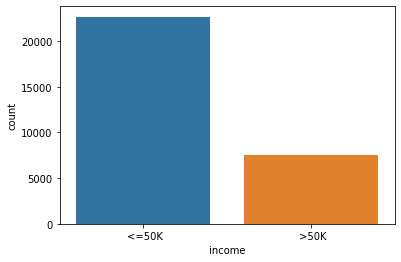

In [25]:
sns.countplot(df['income'])

In [26]:
df.isnull().values.any()

False

In [27]:
df['income'] = df['income'].map({' <=50K' :0, ' >50K' :1}).astype(int) #mapping numbers
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,gov,4,not-married,adim,Not-in-family,White,1,2174,0,40,United-States,0
1,50,self-employed,4,married,adim,Husband,White,1,0,0,13,United-States,0
2,38,Private,1,not-married,nan,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,0,married,nan,Husband,Black,1,0,0,40,United-States,0
4,28,Private,4,married,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [28]:
df.describe()

,age,education,sex,capital-gain,capital-loss,hours-per-week,income
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.175154,0.675685,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.544169,0.468126,7406.346497,404.298370,11.979984,0.432396
min,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,2.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,3.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,6.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


In [29]:
df.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [30]:
df = pd.get_dummies(df)
df

,age,education,sex,capital-gain,capital-loss,hours-per-week,income,workclass_ Private,workclass_gov,workclass_self-employed,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,4,1,2174,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,50,4,1,0,0,13,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,1,1,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,0,1,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,4,0,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,0,0,0,38,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,1,1,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,1,0,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,1,1,0,0,20,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
df.columns

Index(['age', 'education', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_ Private', 'workclass_gov',
       'workclass_self-employed', 'workclass_unemployed',
       'marital-status_Widowed', 'marital-status_married',
       'marital-status_not-married', 'occupation_Prof-specialty',
       'occupation_adim', 'occupation_general', 'occupation_military',
       'occupation_nan', 'occupation_sales', 'occupation_service',
       'relationship_ Husband', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'native-country_ Cambodia',
       'native-country_ Canada', 'native-country_ China',
       'native-country_ Columbia', 'native-country_ Cuba',
       'native-country_ Dominican-Republic', 'native-country_ Ecuador',
       'native-country

In [32]:
new_cols = ['age', 'education', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Private', 'workclass_gov',
       'workclass_self-employed', 'workclass_unemployed',
       'marital-status_Widowed', 'marital-status_married',
       'marital-status_not-married', 'occupation_Prof-specialty',
       'occupation_adim', 'occupation_general', 'occupation_military',
       'occupation_nan', 'occupation_sales', 'occupation_service',
       'relationship_ Husband', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife',
       'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'native-country_ Cambodia',
       'native-country_ Canada', 'native-country_ China',
       'native-country_ Columbia', 'native-country_ Cuba',
       'native-country_ Dominican-Republic', 'native-country_ Ecuador',
       'native-country_ El-Salvador', 'native-country_ England',
       'native-country_ France', 'native-country_ Germany',
       'native-country_ Greece', 'native-country_ Guatemala',
       'native-country_ Haiti', 'native-country_ Holand-Netherlands',
       'native-country_ Honduras', 'native-country_ Hong',
       'native-country_ Hungary', 'native-country_ India',
       'native-country_ Iran', 'native-country_ Ireland',
       'native-country_ Italy', 'native-country_ Jamaica',
       'native-country_ Japan', 'native-country_ Laos',
       'native-country_ Mexico', 'native-country_ Nicaragua',
       'native-country_ Outlying-US(Guam-USVI-etc)', 'native-country_ Peru',
       'native-country_ Philippines', 'native-country_ Poland',
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia', 'income']
df=df[new_cols]

In [33]:
df

,age,education,sex,capital-gain,capital-loss,hours-per-week,workclass_ Private,workclass_gov,workclass_self-employed,workclass_unemployed,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income
0,39,4,1,2174,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,4,1,0,0,13,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,38,1,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,4,0,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,0,0,0,38,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,40,1,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32558,58,1,0,0,0,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,22,1,1,0,0,20,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
X = df.drop('income',axis=1)
y = df['income']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=99)

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA()
X = pca.fit_transform(X)

In [39]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.97026299e-01, 2.96791527e-03, 3.21552664e-06, 2.47506095e-06,
       4.34958638e-08, 1.34217356e-08, 5.24415588e-09, 4.83566630e-09,
       3.70114407e-09, 3.32195081e-09, 3.05343524e-09, 2.87789176e-09,
       2.44598027e-09, 2.04082382e-09, 1.86959702e-09, 1.82137203e-09,
       1.62577111e-09, 9.64172408e-10, 8.11267364e-10, 7.13178528e-10,
       6.44992172e-10, 6.00447596e-10, 2.70590737e-10, 2.23529401e-10,
       1.50781063e-10, 9.48473120e-11, 7.44956874e-11, 6.43389314e-11,
       6.23573811e-11, 6.04027494e-11, 5.78447861e-11, 5.59413724e-11,
       5.34716787e-11, 4.91525405e-11, 4.43875351e-11, 4.18310148e-11,
       4.00646764e-11, 3.94913743e-11, 3.86288547e-11, 3.61537042e-11,
       3.54863653e-11, 3.36591213e-11, 2.97935740e-11, 2.73447200e-11,
       2.50818185e-11, 2.31273894e-11, 2.04174811e-11, 1.98768049e-11,
       1.85108699e-11, 1.76845027e-11, 1.66509855e-11, 1.60930299e-11,
       1.46894195e-11, 1.15553037e-11, 1.12124322e-11, 1.11694747e-11,
      

In [40]:
pca = PCA(n_components=6)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)
x_train_pca[0:5]

array([[ 1.76695752, -0.47122562, -0.92958807, -0.30522519, -1.03040414,
         0.91183023],
       [-2.49828399, -0.59851456, -2.03880205,  0.17889395, -1.10492848,
         0.16683489],
       [ 2.66411318, -0.64646294,  0.76831841, -0.50285863, -0.60709867,
        -0.73562171],
       [ 2.45187375, -0.44605012,  0.50274501, -0.34938227, -0.4332006 ,
         1.35485885],
       [-2.19071033, -0.84692914,  0.11256759, -0.68066876,  0.42275389,
        -0.22159474]])

In [41]:
model = tf.keras.models.Sequential()

In [42]:
model.add(tf.keras.layers.Dense(16,activation='relu',input_shape=(6,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16,activation="softmax"))
model.add(tf.keras.layers.Dense(2,activation='sigmoid'))

In [43]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                112       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 418
Trainable params: 418
Non-trainable params: 0
_________________________________________________________________


In [45]:
class_weights = {0:1, 1:3}

In [46]:
y_train

13267    1
11109    0
2386     1
23420    1
10279    0
        ..
736      0
13167    0
28666    0
2176     0
29991    0
Name: income, Length: 24129, dtype: int64

In [47]:
history = model.fit(x_train_pca, y_train, batch_size = 500, epochs= 60, class_weight = class_weights, validation_split=0.2)

Epoch 1/60
39/39 [==============================] - 2s 13ms/step - loss: 1.0285 - accuracy: 0.5928 - val_loss: 0.6690 - val_accuracy: 0.7329
Epoch 2/60
39/39 [==============================] - 0s 6ms/step - loss: 0.9785 - accuracy: 0.6977 - val_loss: 0.6280 - val_accuracy: 0.7495
Epoch 3/60
39/39 [==============================] - 0s 6ms/step - loss: 0.9247 - accuracy: 0.7306 - val_loss: 0.5820 - val_accuracy: 0.7487
Epoch 4/60
39/39 [==============================] - 0s 10ms/step - loss: 0.8740 - accuracy: 0.7395 - val_loss: 0.5441 - val_accuracy: 0.7497
Epoch 5/60
39/39 [==============================] - 0s 7ms/step - loss: 0.8356 - accuracy: 0.7398 - val_loss: 0.5203 - val_accuracy: 0.7499
Epoch 6/60
39/39 [==============================] - 0s 9ms/step - loss: 0.8077 - accuracy: 0.7420 - val_loss: 0.5089 - val_accuracy: 0.7532
Epoch 7/60
39/39 [==============================] - 0s 7ms/step - loss: 0.7943 - accuracy: 0.7433 - val_loss: 0.5040 - val_accuracy: 0.7553
Epoch 8/60
39/39 [

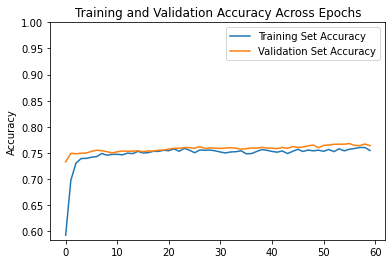

In [48]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

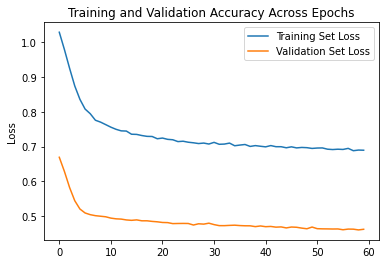

In [49]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
y_pred = model.predict(x_test_pca)
y_pred = y_pred.argmax(axis=1)

189/189 [==============================] - 1s 2ms/step


In [52]:
from sklearn import metrics

In [53]:
score = metrics.accuracy_score(y_test, y_pred)
print('test set accuracy: ', score)

test set accuracy:  0.7724183656555611


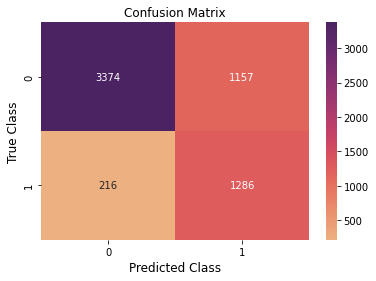

In [54]:
confusion_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(confusion_matrix, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      4531
           1       0.53      0.86      0.65      1502

    accuracy                           0.77      6033
   macro avg       0.73      0.80      0.74      6033
weighted avg       0.84      0.77      0.79      6033

